---
---
# **Gaussian Mixture Model (GMM)**
---
---

Es un modelo probabilístico que asume que las instancias fueron generadas de una mezcla de varias distribuciones Gausianas cuyos parámetros son desconocidos.

Todas las instancias generadas de una sola distribución Guassiana forman un cluster que típicamente luce como una elipsoide.

Cada cluster puede tener a diferente forma elipsoidal, tamaño densidad y orientación.


Cuando tú observas una instancia, sabes que fue genertada a partir de una de una distribución Gaussiana, pero no puedes decir cuál, y no  sabes qué parámetros de distribución tiene.


**Existen bastantes variaciones de GMM: en la más simple, implementada en la clase GaussianMixture, se debe de conocer previamente el número *k* de distribuciones Gaussianas.**



In [ ]:
from sklearn.datasets import make_blobs
import numpy as np

X1, y1 = make_blobs(n_samples=1000,  centers=((4, -4), (0,0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))

X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)

X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [ ]:
gm.weights_

array([0.39025715, 0.40007391, 0.20966893])

In [ ]:
gm.means_

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [ ]:
gm.covariances_

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

¿El algoritmo convergió?

In [ ]:
gm.converged_

True

Sí, ¿Cuántas iteraciones tomó?

In [ ]:
gm.n_iter_

4

Ahora se puede usar el  modelo para predecir a qué cluster pertence cada instancia (*hard clustering*) o la probabilidad de que provenga de algún cluster. Para emplearlo, solo se usa el método *predict()* o el método *predict_proba()*.

In [ ]:
gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2])

In [ ]:
gm.predict_proba(X)

array([[9.76741808e-01, 6.78581203e-07, 2.32575136e-02],
       [9.82832955e-01, 6.76173663e-04, 1.64908714e-02],
       [7.46494398e-05, 9.99923327e-01, 2.02398402e-06],
       ...,
       [4.26050456e-07, 2.15512941e-26, 9.99999574e-01],
       [5.04987704e-16, 1.48083217e-41, 1.00000000e+00],
       [2.24602826e-15, 8.11457779e-41, 1.00000000e+00]])

El caos anteriormente visto cae en el algoritmo de *Expectation-Maximization (EM)*, el cual tiene muchas similitudes con K-Means.

Inicializa los parámetros del cluster aleatoriamente, luego repite dos pasos hasta converger, primero asigna instancias a los clusters (*expectation step*) luego acutailiza los clusters (*maximization step*).

**Se puede pensar en EM como una generalización de K-Means, la cual no solo encuentra el centro de los clusters, sino que también su tamaño, forma y orientación, al igual que sus pesos relativos.**

**Al igual que K-Means, EM puede terminar convergiendo en soluciones pobres, así que necesita ser corrido varias veces, guardando solamente la mejor solución.**

**Es un *modelo generativo*, así que se pueden muestrear nuevas instancias.**

In [ ]:
X_new, y_new= gm.sample(6)
X_new

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-2.8014927 , -0.09047309],
       [ 3.98203732,  1.49951491],
       [ 3.81677148,  0.53095244],
       [ 2.84104923, -0.73858639]])

In [ ]:
y_new

array([0, 0, 1, 2, 2, 2])

También se puede estimar la densidad del modelo en una locación dado. Esto se logra empleando el método *score_samples()*.

In [ ]:
gm.score_samples(X)

array([-2.60768954, -3.57110232, -3.32987086, ..., -3.51347241,
       -4.39798588, -3.80746532])

**PDF (*Probability densities*)**

In [ ]:
resolution = 100
grid = np.arange(-10, 10, 1/resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1/resolution) ** 2
pdf_probas.sum()

0.9999999999215022

In [ ]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

In [ ]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

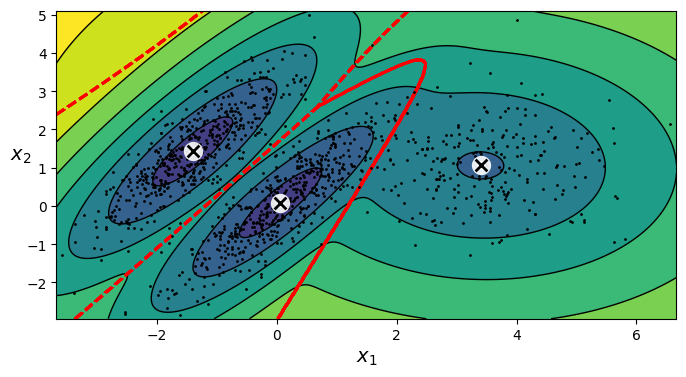

In [ ]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()

EL algoritmo a encontrado una solución clara. Esto porque los datos fueron generados usando uns distribución Gaussiana 2D. Desafortunadamente, en la vida real, los datos no siempre seran Gaussianos y de baja dimensión. Además, le dimos al algoritmo el número correcto de clusters. Cuando hay muchas dimensiones, o muchos clusters, o muchas instancias, a EM le puede costar trabajo converger a la solución óptima.

Para lograrlo se debe reducir la dificultad de la tarea limitando el número de parámetros que el algoritmo debe aprender: Una forma de hacerlo es limitar el rango de formas y orientaciones que el clusters pueden tener. Esto puede ser conseguido imponiendo condiciones a las matrices de covariancias. Para hacer esto, hay que ajustar el hiperparámetro *covariance_type* a alguno de los siguientes valores:

* *'spherical'*: Todos los clusters deben ser esféricos, pero pueden tener diferentes diámetros (es decir, distintas varianzas).
* *'diag'*: Los clusters pueden tomar cualquier forma elipsoidal de cualquier tamaño, pero los ejes de la elipsoide deben ser paralelos a los ejes de coordeanas (es decir, las matrices de covarianzas deben ser diagonales).
* *'tied'*: todos los clusters deben tener la misma forma elipsoidal, tamaño y orientación (es decir, todos los clusters comparten la misma matriz de covarianza).

In [ ]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type='full', random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type='tied', random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type='spherical', random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type='diag', random_state=42)

gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

In [ ]:

def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

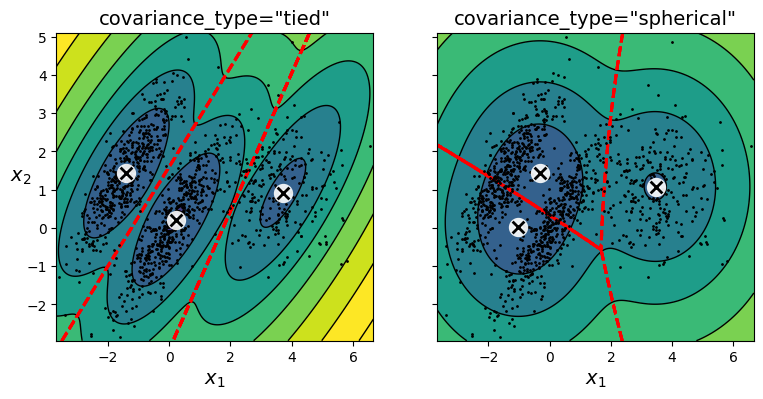

In [ ]:

compare_gaussian_mixtures(gm_tied, gm_spherical, X)

plt.show()

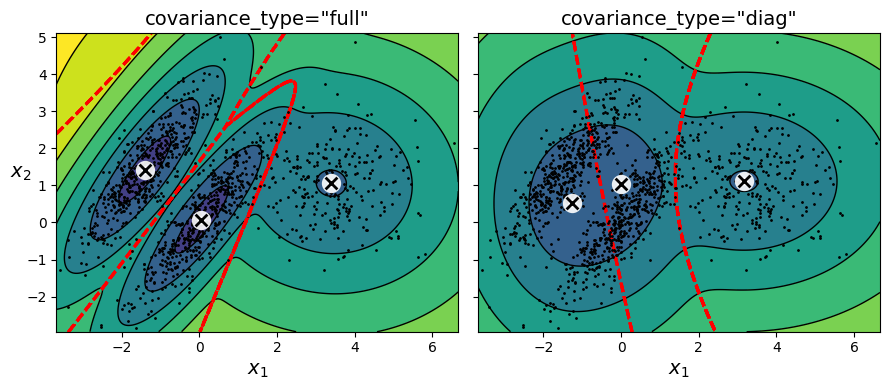

In [ ]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

# **Detección de anomalías**
---
Con Gaussian Mixture, detectar *outliers* es muy simple: **Cualquier instancia localizada en una región de baja densidad puede ser considerada como una anomalía**.

**Esto se trata de un problema de *precision/recall trade off, así que si hay muy falsos negativos, se debería bajar el *threshold*, de lo contrario, si hay muchos falsos positivos, se debería subir.**

Los modelos Gaussian Mixture se entrenar para ajustar todos los datos, incluyendo los *outliers*, en dado caso que se posean muchos de ellos, habrá un sesgo del modelo: algunos outliers serán considerados incorrectamente como normales. Para arreglar esto, se puede entrenar el modelo una vez, usarlo para detectar anomalías, luego entrenarlo otra vez con el dataset limpio. Otro enfoque es usar métodos robustos de estimación de covarianza (*EllipticEnvelope class*).


In [ ]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

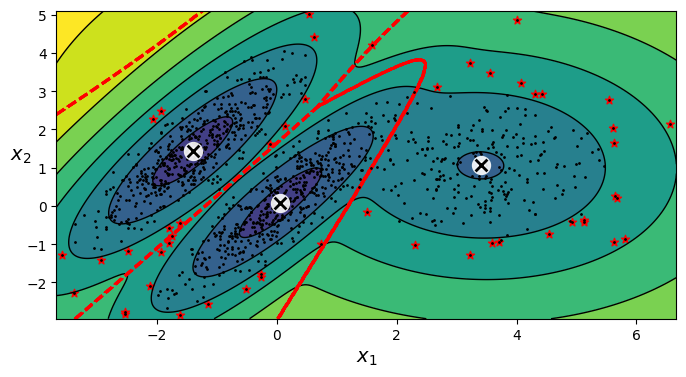

In [ ]:
plt.figure(figsize=(8,4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

# **Elegir el número de clusters**
---

Con K-Means se podría utilizar la *inertia* o el *silhouette score* para seleccionar la aproximación al número de clusters, pero con Gaussian Mixtures, eso no es posible porque **no son fidedignas cuando los clusters no son esféricos o tienen diferentes tamaños**.

En lugar de eso, se puede encontrar buscar el model oque minimice un *criterio de información teórica*, como lo es *Bayesian information criterion (BIC) o Akaike information criterion (AIC)*

Ambos penalizan modelos que tienen más parámetros para aprender (por ejemplo, más clusters), y premian modelos que ajustan correctamente los datos.

In [ ]:
gm.bic(X)

8189.747000497186

In [ ]:
gm.aic(X)

8102.521720382148

In [ ]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
            for k in range(1, 11)]

In [ ]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

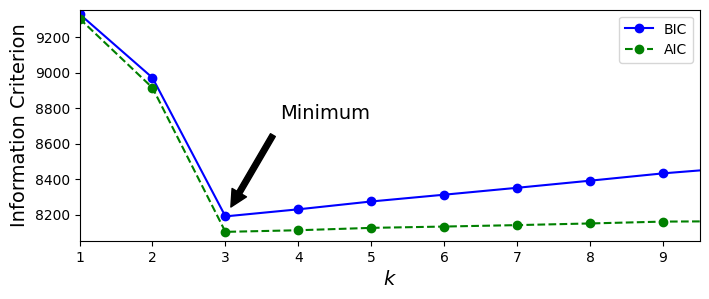

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

In [ ]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [ ]:
best_k

3

In [ ]:
best_covariance_type

'full'

# **Bayesian Gaussian Mixture Models**
---

En lugar de buscar manualmente el número óptimo de clusters, es posible utilizar la clase *BayesianGaussianMixture*, la cual es capaz de dar pesos igual (o parecidos) a cero a los clusters innecesarios.

Lo único que hay que hacer es ajustar el número de *n_components* a algún valor que se crea que es mayor que el número de clusters óptimo.

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

Podremos el valor de 10

In [ ]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [ ]:
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

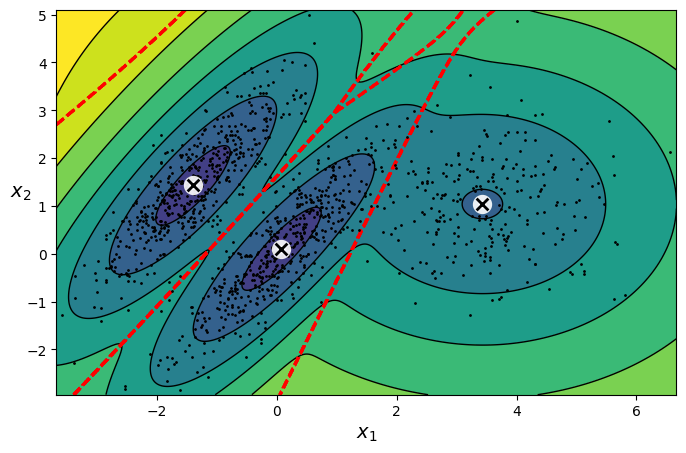

In [ ]:
plt.figure(figsize=(8,5))
plot_gaussian_mixture(bgm, X)
plt.show()

In [ ]:
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=0.01, random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=10000, random_state=42)
nn = 73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(max_iter=1000, n_components=10, random_state=42,
                        weight_concentration_prior=10000)

In [ ]:
np.round(bgm_low.weights_, 2)

array([0.52, 0.48, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [ ]:
np.round(bgm_high.weights_, 2)

array([0.01, 0.18, 0.27, 0.11, 0.01, 0.01, 0.01, 0.01, 0.37, 0.01])

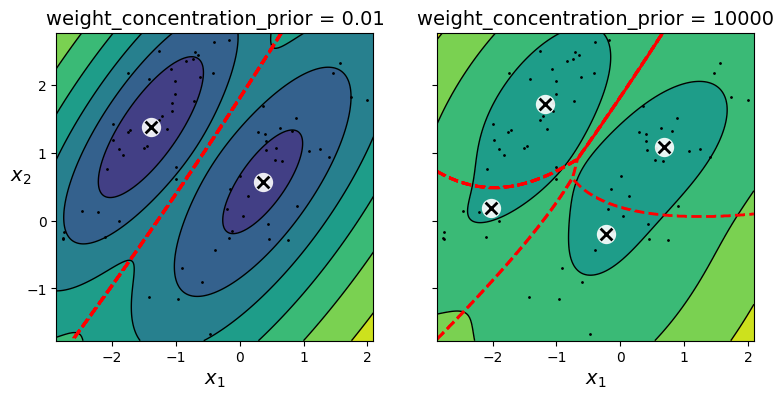

In [ ]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)

plt.show()

In [ ]:
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [ ]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

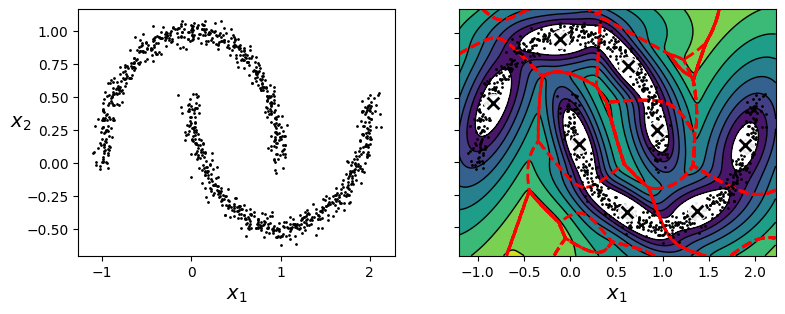

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

plt.show()

En este caso, el clustering no fue uy bueno, y en lugar de detectar 2 de ellos, detectó 8 clusters elipsoidales. De todas formas, la densidad no luce mal, así que puede ser utilizado para detección de anomalías.

**Función Likelihood**

In [ ]:
from scipy.stats import norm

In [ ]:
xx = np.linspace(-6, 4, 101)
ss = np.linspace(1, 2, 101)
XX, SS = np.meshgrid(xx, ss)
ZZ = 2 * norm.pdf(XX - 1.0, 0, SS) + norm.pdf(XX + 4.0, 0, SS)
ZZ = ZZ / ZZ.sum(axis=1)[:,np.newaxis] / (xx[1] - xx[0])

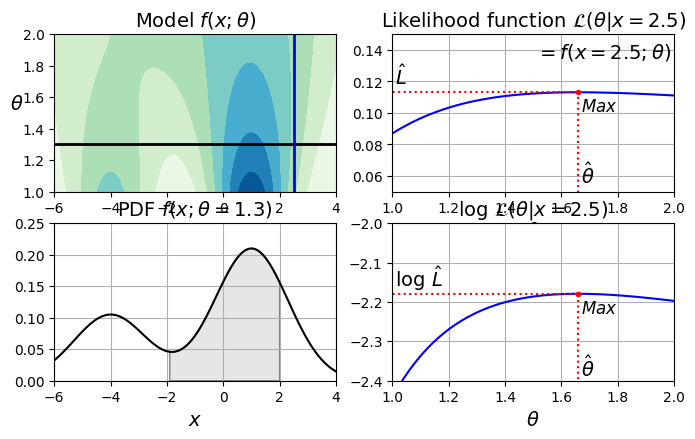

In [ ]:
from matplotlib.patches import Polygon

plt.figure(figsize=(8, 4.5))

x_idx = 85
s_idx = 30

plt.subplot(221)
plt.contourf(XX, SS, ZZ, cmap="GnBu")
plt.plot([-6, 4], [ss[s_idx], ss[s_idx]], "k-", linewidth=2)
plt.plot([xx[x_idx], xx[x_idx]], [1, 2], "b-", linewidth=2)
plt.xlabel(r"$x$")
plt.ylabel(r"$\theta$", fontsize=14, rotation=0)
plt.title(r"Model $f(x; \theta)$", fontsize=14)

plt.subplot(222)
plt.plot(ss, ZZ[:, x_idx], "b-")
max_idx = np.argmax(ZZ[:, x_idx])
max_val = np.max(ZZ[:, x_idx])
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [0, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.text(1.01, max_val + 0.005, r"$\hat{L}$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, 0.055, r"$\hat{\theta}$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, max_val - 0.012, r"$Max$", fontsize=12)
plt.axis([1, 2, 0.05, 0.15])
plt.xlabel(r"$\theta$", fontsize=14)
plt.grid(True)
plt.text(1.99, 0.135, r"$=f(x=2.5; \theta)$", fontsize=14, ha="right")
plt.title(r"Likelihood function $\mathcal{L}(\theta|x=2.5)$", fontsize=14)

plt.subplot(223)
plt.plot(xx, ZZ[s_idx], "k-")
plt.axis([-6, 4, 0, 0.25])
plt.xlabel(r"$x$", fontsize=14)
plt.grid(True)
plt.title(r"PDF $f(x; \theta=1.3)$", fontsize=14)
verts = [(xx[41], 0)] + list(zip(xx[41:81], ZZ[s_idx, 41:81])) + [(xx[80], 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
plt.gca().add_patch(poly)

plt.subplot(224)
plt.plot(ss, np.log(ZZ[:, x_idx]), "b-")
max_idx = np.argmax(np.log(ZZ[:, x_idx]))
max_val = np.max(np.log(ZZ[:, x_idx]))
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [-5, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.axis([1, 2, -2.4, -2])
plt.xlabel(r"$\theta$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, max_val - 0.05, r"$Max$", fontsize=12)
plt.text(ss[max_idx]+ 0.01, -2.39, r"$\hat{\theta}$", fontsize=14)
plt.text(1.01, max_val + 0.02, r"$\log \, \hat{L}$", fontsize=14)
plt.grid(True)
plt.title(r"$\log \, \mathcal{L}(\theta|x=2.5)$", fontsize=14)

plt.show()

# **Otros Algoritmos de detección de anomalías y novedaded**